In [78]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import pickle
import numpy as np

In [2]:
promise_zone = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zone.crs)
promise_zone.head(7 )

epsg:2274


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."
5,6,6,9.535996e+07,59256.923574,"POLYGON ((1716935.654 667534.495, 1716992.481 ..."


In [3]:
promise_zone = promise_zone.to_crs(epsg = 4326)

In [4]:
promise_zone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6 non-null      int64   
 1   ZONE_ID     6 non-null      int64   
 2   SHAPE_STAr  6 non-null      float64 
 3   SHAPE_STLe  6 non-null      float64 
 4   geometry    6 non-null      geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 368.0 bytes


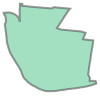

In [5]:
promise_zone.geometry[0]

In [6]:
promise_zone.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((-86.76297 36.19364, -86.76297 36.193..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((-86.77838 36.14889, -86.77823 36.148..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((-86.70771 36.16723, -86.70758 36.166..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((-86.74735 36.13036, -86.74728 36.130..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((-86.78490 36.23358, -86.78452 36.232..."


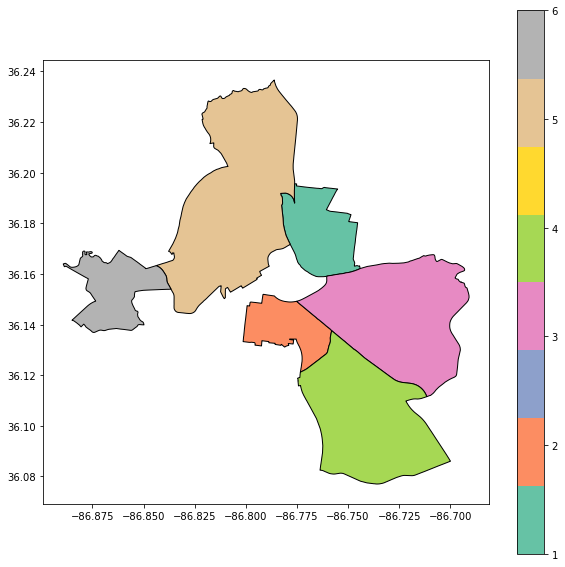

In [7]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Promise_Zone_id', 'loc': 'upper left', 
            'bbox_to_anchor': (1.05, 1.05)}

promise_zone.plot(column = 'ZONE_ID', figsize=(10, 10),
              edgecolor = 'black',
              legend = True,
              cmap = 'Set2')
plt.show()

In [8]:
polygon_zone_6 = promise_zone.loc[promise_zone['ZONE_ID']==6]
polygon_zone_6.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
5,6,6,9.535996e+07,59256.923574,"POLYGON ((-86.85223 36.16417, -86.85204 36.164..."


In [9]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops.head(3)

(2524, 5)


,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004


In [10]:
bus_stops['geometry'] = bus_stops.apply(lambda x: Point((x.lng,x.lat)),
                                        axis=1)
bus_stops.head(3)

,stop,route,location,lat,lng,geometry
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.816722 36.236249)
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.780897 36.142642)
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.672004 36.105615)


In [11]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = promise_zone.crs, 
                           geometry = bus_stops['geometry'])

In [12]:
stops_by_zone = gpd.sjoin( bus_geo,promise_zone, op = 'within')

In [13]:
stops_in_zone6 = stops_by_zone.loc[stops_by_zone['ZONE_ID']==6]

In [21]:
stops_by_zone.head()

,stop,route,location,lat,lng,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.78090 36.14264),1,2,2,7.670585e+07,45226.018917
3,17TH AVE S & DOROTHY PL SB,BELMONT,"(36.137623, -86.795609)",36.137623,-86.795609,POINT (-86.79561 36.13762),1,2,2,7.670585e+07,45226.018917
5,WEDGEWOOD AVE & 18TH AVE S WB,UNIVERSITY CONNECTOR,"(36.137212, -86.796865)",36.137212,-86.796865,POINT (-86.79686 36.13721),1,2,2,7.670585e+07,45226.018917
53,WEDGEWOOD AVE & 17TH AVE S EB,UNIVERSITY CONNECTOR,"(36.136868, -86.795931)",36.136868,-86.795931,POINT (-86.79593 36.13687),1,2,2,7.670585e+07,45226.018917
61,WEDGEWOOD AVE & 16TH AVE WB,RIVERGATE EXPRESS,"(36.136319, -86.794443)",36.136319,-86.794443,POINT (-86.79444 36.13632),1,2,2,7.670585e+07,45226.018917


In [22]:
stops_by_zone['ZONE_ID'].value_counts()

5    366
3    177
1    127
2    110
4     84
6     50
Name: ZONE_ID, dtype: int64

In [24]:
zone_6_center = polygon_zone_6.centroid
print(zone_6_center)

5    POINT (-86.86377 36.15331)
dtype: geometry


C:\Users\RMAUR\AppData\Local\Temp/ipykernel_9584/2329981329.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone_6_center = polygon_zone_6.centroid


In [26]:
zone_6_area = (zone_6_center.y,zone_6_center.x)

In [90]:
map_area_6 = folium.Map(location =  zone_6_area, zoom_start = 12)

folium.GeoJson(polygon_zone_6).add_to(map_area_6)

for row_index, row_values in stops_in_zone6.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_area_6)

map_area_6

In [27]:
july_scooters = pd.read_csv('../data/july.csv')


In [28]:
company_dict = {'Bird':0, 'Lyft': 1, 'Gotcha': 2, 'Lime': 3, 'Spin': 4, 'Jump': 5, 'Bolt': 6}
july_scooters.companyname = july_scooters.companyname.replace(company_dict)
july_scooters.head()

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01 00:00:33.550000,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,1
1,2019-07-01 00:00:34.973000,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,1
2,2019-07-01 00:00:41.183000,36.179319,-86.751538,Powered570380,Powered,76.0,scooter,0.15,1
3,2019-07-01 00:00:41.620000,36.152111,-86.803821,Powered240631,Powered,43.0,scooter,0.15,1
4,2019-07-01 00:00:45.087000,36.149355,-86.797550,Powered970404,Powered,52.0,scooter,0.15,1


In [29]:
july_scooters.pubdatetime = pd.to_datetime(july_scooters.pubdatetime)

In [30]:
july_scooters.to_pickle("../data/july.pkl")

In [31]:
july_scooters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25075445 entries, 0 to 25075444
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   sumdtype     object        
 5   chargelevel  float64       
 6   sumdgroup    object        
 7   costpermin   float64       
 8   companyname  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 1.7+ GB


In [34]:
july_scooters = july_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [33]:
%%time
july_test = pd.read_pickle("../data/july.pkl")

Wall time: 6.46 s


In [35]:
july_scooters.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,1
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,33.0,1
2,2019-07-01 00:00:41.183,36.179319,-86.751538,Powered570380,76.0,1
3,2019-07-01 00:00:41.620,36.152111,-86.803821,Powered240631,43.0,1
4,2019-07-01 00:00:45.087,36.149355,-86.797550,Powered970404,52.0,1


In [36]:
type(july_scooters.pubdatetime)

pandas.core.series.Series

In [59]:
##july 1 was a monday
july_1_scooters = july_scooters[july_scooters['pubdatetime']<='2019-07-02 00:00:00.000'] 

<AxesSubplot:ylabel='Frequency'>

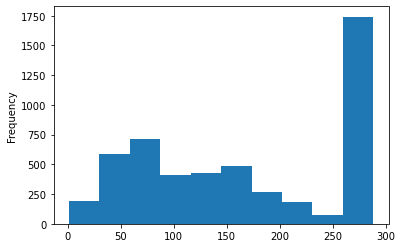

In [69]:
july_1_scooters.sumdid.value_counts().plot(kind='hist')

In [118]:
scoot_FXC5KHVLI3T7C = july_1_scooters[july_1_scooters['sumdid'] == 'PoweredFXC5KHVLI3T7C']
scoot_FXC5KHVLI3T7C.longitude.value_counts()

-86.685430    30
-86.844308    17
-86.840493    10
-86.840503     8
-86.840485     8
              ..
-86.840489     1
-86.840497     1
-86.842816     1
-86.840508     1
-86.840565     1
Name: longitude, Length: 74, dtype: int64

In [92]:
july_1_scooters['geometry'] = july_1_scooters.apply(lambda x: Point((x.longitude,x.latitude)),
                                        axis=1)

C:\Users\RMAUR\AppData\Local\Temp/ipykernel_9584/3461957521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_1_scooters['geometry'] = july_1_scooters.apply(lambda x: Point((x.longitude,x.latitude)),


In [ ]:
 = df()
for row_index,row_values in july_1_scooters:

In [93]:
july1_scootgeo = gpd.GeoDataFrame(july_1_scooters, 
                           crs = promise_zone.crs, 
                           geometry = july_1_scooters['geometry'])

In [96]:
july1_scootgeo = gpd.sjoin(july1_scootgeo, polygon_zone_6, op = 'within')

In [100]:
july1_scootgeo.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe
28,2019-07-01 00:00:59.043,36.155672,-86.859306,Powered291741,83.0,1,POINT (-86.85931 36.15567),5,6,6,9.535996e+07,59256.923574
122,2019-07-01 00:01:06.657,36.150246,-86.872431,Powered580775,31.0,1,POINT (-86.87243 36.15025),5,6,6,9.535996e+07,59256.923574
820,2019-07-01 00:01:50.957,36.157560,-86.849080,PoweredUJHQ7,71.0,0,POINT (-86.84908 36.15756),5,6,6,9.535996e+07,59256.923574
2131,2019-07-01 00:04:55.577,36.161058,-86.840499,PoweredFXC5KHVLI3T7C,99.0,3,POINT (-86.84050 36.16106),5,6,6,9.535996e+07,59256.923574
2638,2019-07-01 00:06:16.713,36.155709,-86.859280,Powered291741,83.0,1,POINT (-86.85928 36.15571),5,6,6,9.535996e+07,59256.923574


In [103]:
map_area_6 = folium.Map(location =  zone_6_area, zoom_start = 12)

folium.GeoJson(polygon_zone_6).add_to(map_area_6)

marker_cluster = MarkerCluster().add_to(map_area_6)


for row_index, row_values in stops_in_zone6.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')


    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_area_6)
    

for row_index, row_values in july1_scootgeo.iterrows():
    
    
    loc = [row_values['latitude'], row_values['longitude']]    
    pop = str(row_values['sumdid'])
    
    scoot_marker = folium.Marker(
        location = loc,
        popup = pop)
    scoot_marker.add_to(marker_cluster)
map_area_6
        